# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow
import numpy as np
tf = tensorflow.compat.v1
tf.disable_v2_behavior()



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [4]:
type(mnist)

module

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

### Visualizing the Data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x_train[1].shape

(28, 28)

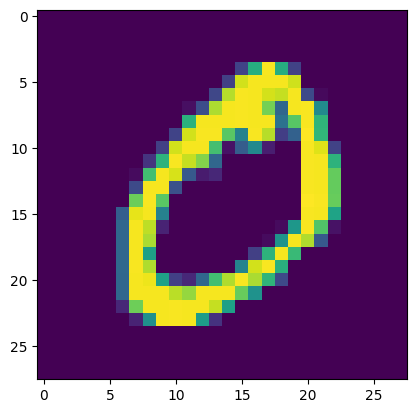

In [9]:
plt.imshow(x_train[1].reshape(28,28))

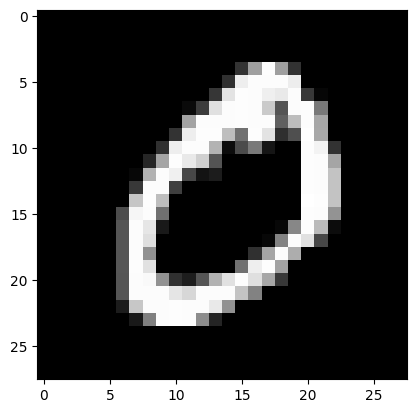

In [10]:
plt.imshow(x_train[1].reshape(28,28),cmap='gist_gray')

In [11]:
x_train[1].max()

255

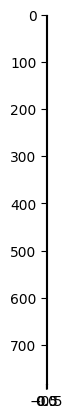

In [12]:
plt.imshow(x_train[1].reshape(784,1))

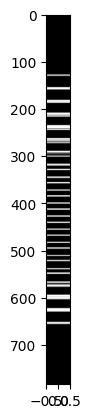

In [13]:
plt.imshow(x_train[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

## Create the Model

In [14]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [15]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [16]:
b = tf.Variable(tf.zeros([10]))

In [17]:
# Create the Graph
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [18]:
y_true = tf.placeholder(tf.float32,[None,10])

In [19]:
# Cross Entropy


In [20]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [22]:
train = optimizer.minimize(cross_entropy)

### Create Session

In [23]:
init = tf.global_variables_initializer()

In [24]:
def next_batch(images, labels, batch_size):
    # Obtener el número total de ejemplos
    num_examples = images.shape[0]
    # Generar índices aleatorios para el batch
    indices = np.random.choice(num_examples, batch_size)
    # Obtener el batch de imágenes y etiquetas correspondientes
    batch_x = images[indices]
    batch_y = labels[indices]
    return batch_x, batch_y

In [25]:
y_train.shape

(60000,)

In [26]:
a = x_train.reshape(60000, 784)
b = tf.one_hot(y_train, depth=10)

x_test = x_test.reshape(10000, 784)
y_test = tf.one_hot(y_test, depth=10)
07-Mnist-Basic-Approach.ipynb
with tf.Session() as sess:
    b = sess.run(b)
with tf.Session() as sess:
    y_test = sess.run(y_test)

with tf.Session() as sess:
    sess.run(init)

    for step in range(1000):

        batch_x, batch_y = next_batch(a, b, 100)

        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})


    # Test the Train Model

    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))

    acc = tf.reduce_mean(tf.cast(matches, tf.float32))


    print(sess.run(acc, feed_dict={x: x_test, y_true: y_test}))

0.8927


While this may seem pretty good, we can actually do much better, the best models can get above 99% accuracy.

How do they do this? By using other models, such as convolutional neural networks!